In [1]:
import sys
sys.path.append("../../src")
sys.path.append("..")

import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

from utils.kernel_utils import RBF, ColumnwiseRBF
from causal_models.causal_learning import KernelATE, KernelATT
from generate_experiment_data import generate_train_jobcorp

from jax import config
config.update("jax_enable_x64", True)

In [2]:
data_path = '../../data/JCdata.csv'

U, Y, A = generate_train_jobcorp(data_path)
U = jnp.array(U, dtype = jnp.float64)
Y = jnp.array(Y, dtype = jnp.float64)
A = jnp.array(A, dtype = jnp.float64)

# Average Treatment Effect Model

In [3]:
kernel_X = RBF(use_length_scale_heuristic = True, use_jit_call = True)
kernel_A = RBF(use_length_scale_heuristic = True, )
optimize_regularization_parameters = True
lambda_optimization_range = (1e-9, 1.0)
regularization_grid_points = 150

KernelATE_model = KernelATE(kernel_X = kernel_X,
                            kernel_A = kernel_A, 
                            optimize_regularization_parameters = optimize_regularization_parameters, 
                            lambda_optimization_range = lambda_optimization_range, 
                            regularization_grid_points = regularization_grid_points)

In [4]:
KernelATE_model.fit((A, U), Y)

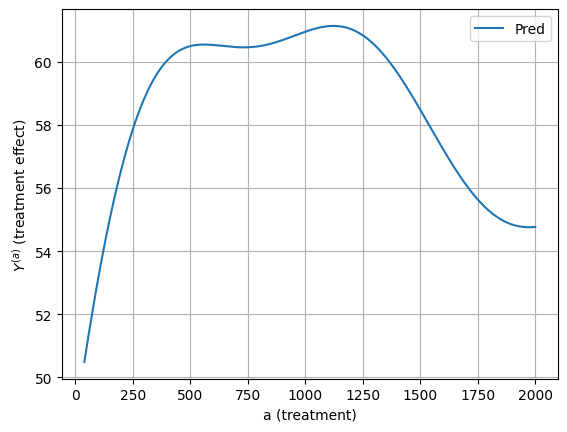

In [5]:
do_A = jnp.linspace(40, 2000, 1000)[:, jnp.newaxis]
A_linspace = do_A

f_struct_pred = KernelATE_model.predict(do_A.reshape(-1, 1))

plt.plot(do_A, f_struct_pred, label = "Pred")
# plt.plot(A_linspace, EY_do_A, linewidth = 4, color = "red", alpha=0.7, linestyle = "dashed", label = "f-struct")
plt.grid()
plt.xlabel("a (treatment)")
plt.ylabel(r"$Y^{(a)}$ (treatment effect)")
plt.legend()
plt.show()

# Average Treatment on the Treated Model

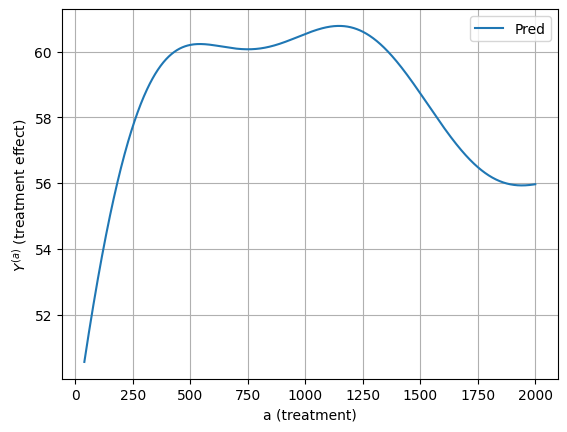

In [9]:
RBF_Kernel_A_ = RBF(use_length_scale_heuristic = True, use_jit_call = True)
RBF_Kernel_X_ = RBF(use_length_scale_heuristic = True, use_jit_call = True)
optimize_regularization_parameters = True
lambda_optimization_range = (1e-9, 1.0)
regularization_grid_points = 150

model_KernelATT = KernelATT(
    kernel_A = RBF_Kernel_A_,
    kernel_X = RBF_Kernel_X_,
    optimize_regularization_parameters = optimize_regularization_parameters, 
    lambda_optimization_range = lambda_optimization_range, 
    regularization_grid_points = regularization_grid_points
)

model_KernelATT.fit((A, U), Y)

a_prime = jnp.array([2000])
f_struct_pred_katt = model_KernelATT.predict(do_A, a_prime)

plt.plot(do_A, f_struct_pred_katt, label = "Pred")
# plt.plot(A_linspace, EY_do_A, linewidth = 4, color = "red", alpha=0.7, linestyle = "dashed", label = "f-struct")
plt.grid()
plt.xlabel("a (treatment)")
plt.ylabel(r"$Y^{(a)}$ (treatment effect)")
plt.legend()
plt.show()